# 18기 Clustering 정규세션 과제

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ToBig's/week4/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## EDA

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.info() #na로 표기된 null 값은 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

(array([ 5.,  7.,  4.,  9.,  8.,  3.,  2.,  4.,  4.,  3.,  8.,  6., 15.,
         8., 12., 14., 14.,  9.,  6.,  2.,  3.,  3., 15.,  6.,  3.,  3.,
         8.,  7.,  5.,  4.]),
 array([ 1.        ,  4.26666667,  7.53333333, 10.8       , 14.06666667,
        17.33333333, 20.6       , 23.86666667, 27.13333333, 30.4       ,
        33.66666667, 36.93333333, 40.2       , 43.46666667, 46.73333333,
        50.        , 53.26666667, 56.53333333, 59.8       , 63.06666667,
        66.33333333, 69.6       , 72.86666667, 76.13333333, 79.4       ,
        82.66666667, 85.93333333, 89.2       , 92.46666667, 95.73333333,
        99.        ]),
 <a list of 30 Patch objects>)

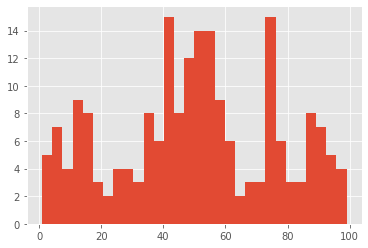

In [ ]:
plt.hist(df['Spending Score (1-100)'], bins=30)

(array([12., 10.,  9.,  4.,  5., 10., 12.,  8., 14., 14.,  9.,  6.,  9.,
         4.,  3.,  5.,  9., 12.,  5.,  4.,  6.,  2.,  2.,  6.,  3.,  2.,
         1.,  4.,  7.,  3.]),
 array([18.        , 19.73333333, 21.46666667, 23.2       , 24.93333333,
        26.66666667, 28.4       , 30.13333333, 31.86666667, 33.6       ,
        35.33333333, 37.06666667, 38.8       , 40.53333333, 42.26666667,
        44.        , 45.73333333, 47.46666667, 49.2       , 50.93333333,
        52.66666667, 54.4       , 56.13333333, 57.86666667, 59.6       ,
        61.33333333, 63.06666667, 64.8       , 66.53333333, 68.26666667,
        70.        ]),
 <a list of 30 Patch objects>)

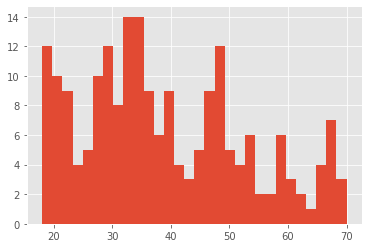

In [ ]:
plt.hist(df['Age'], bins=30)

(array([12.,  8.,  4.,  8.,  6.,  8., 10.,  8., 10., 12.,  6., 20., 10.,
        10., 10., 20.,  2., 14.,  0.,  2.,  6.,  6.,  0.,  0.,  2.,  2.,
         0.,  2.,  0.,  2.]),
 array([ 15.        ,  19.06666667,  23.13333333,  27.2       ,
         31.26666667,  35.33333333,  39.4       ,  43.46666667,
         47.53333333,  51.6       ,  55.66666667,  59.73333333,
         63.8       ,  67.86666667,  71.93333333,  76.        ,
         80.06666667,  84.13333333,  88.2       ,  92.26666667,
         96.33333333, 100.4       , 104.46666667, 108.53333333,
        112.6       , 116.66666667, 120.73333333, 124.8       ,
        128.86666667, 132.93333333, 137.        ]),
 <a list of 30 Patch objects>)

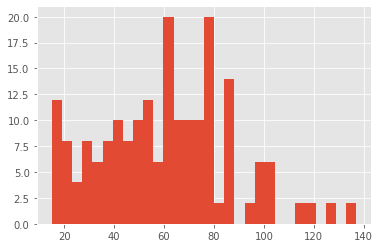

In [ ]:
plt.hist(df['Annual Income (k$)'], bins=30)

고소득자가 적다는 것을 제외하면, 전반적으로 이상치는 발견되지 않음.

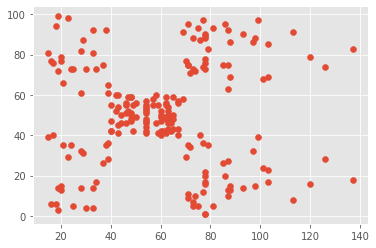

In [ ]:
#소득에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
plt.scatter(x,y)
plt.show()

40 ~ 70의 소득을 가진 경우 소비 수준이 비슷한 것을 볼 수 있다. 그 외에는 소득 수준과 상관없이 다양한 소비 수준이 나타나는 것을 관찰할 수 있다.

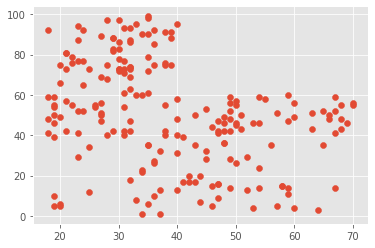

In [ ]:
#나이에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = df['Age']
y = df['Spending Score (1-100)']
plt.scatter(x,y)
plt.show()

40대 이상의 나이에서는 소비 수준이 60 이하로 분포되어있는 것을 볼 수 있다.

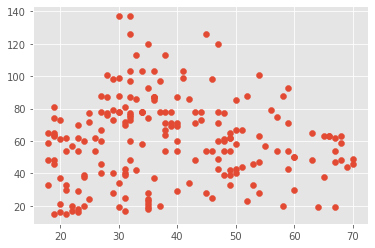

In [ ]:
#나이에 따라 소득 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = df['Age']
y = df['Annual Income (k$)']
plt.scatter(x,y)
plt.show()

청년층과 노년층에서는 고소득자가 관찰되지 않는다. 중장년층에서 가장 소득이 높은 소비자가 많은 분포를 관측할 수 있다.

In [ ]:
female_df = df[df['Gender'] == "Female"]
male_df = df[df['Gender'] == "Male"]

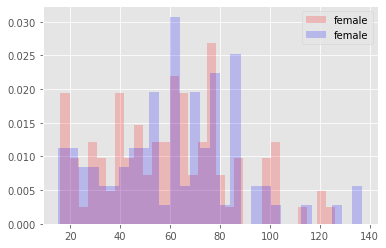

In [ ]:
#성별에 따른 소비수준
plt.hist(female_df['Annual Income (k$)'], label='female', color='red', alpha=0.2, bins=30, density=True)
plt.hist(male_df['Annual Income (k$)'], label='female', color='blue', alpha=0.2, bins=30, density=True)
plt.legend()
plt.show()

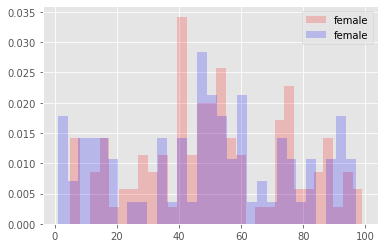

In [ ]:
#성별에 따른 소득수준
plt.hist(female_df['Spending Score (1-100)'], label='female', color='red', alpha=0.2, bins=30, density=True)
plt.hist(male_df['Spending Score (1-100)'], label='female', color='blue', alpha=0.2, bins=30, density=True)
plt.legend()
plt.show()

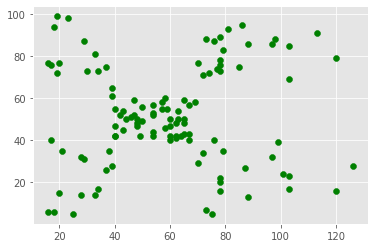

In [ ]:
#여성 소비자의 경우
#소득에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = female_df['Annual Income (k$)']
y = female_df['Spending Score (1-100)']
plt.scatter(x,y, color = 'green')
plt.show()

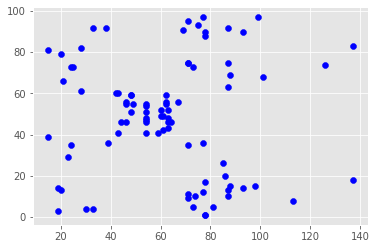

In [ ]:
#남성 소비자의 경우
#소득에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = male_df['Annual Income (k$)']
y = male_df['Spending Score (1-100)']
plt.scatter(x,y, color = 'blue')
plt.show()

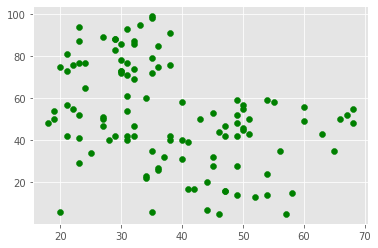

In [ ]:
#여성 소비자의 경우
#나이에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = female_df['Age']
y = female_df['Spending Score (1-100)']
plt.scatter(x,y, color ='green')
plt.show()

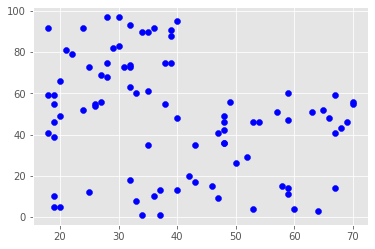

In [ ]:
#남성 소비자의 경우
#나이에 따라 소비 수준이 다를 것인지를 확인하기 위해 시각화 진행
x = male_df['Age']
y = male_df['Spending Score (1-100)']
plt.scatter(x,y, color='blue')
plt.show()

In [ ]:
# female의 경우 1, male의 경우 0이 되도록 원핫코딩 진행
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

## Clustering

### K-means 클러스터링 진행

k-means 클러스터링을 위해서는 2가지 feature를 뽑아 사용해야한다. EDA 시 확인한 것에 의하면

*   소득과 소비 수준
*   나이와 소비 수준이 클러스터링될 가능성이 높아보인다.



In [ ]:
# 나이와 소비 수준 클러스터링
from sklearn.cluster import KMeans

df_1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++') )
    algorithm.fit(df_1)
    inertia.append(algorithm.inertia_)

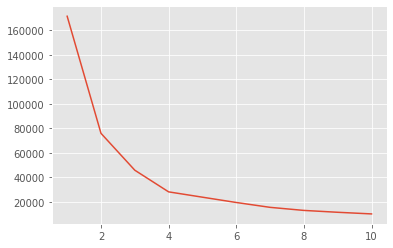

In [ ]:
x = range(1,11)
y = inertia

plt.plot(x, y)

엘보우 포인트를 4 부근에서 관찰 가능 -> k = 4로 설정

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


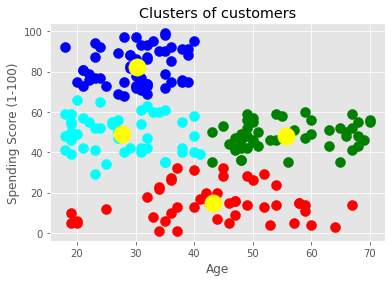

In [ ]:
kmeans = (KMeans(n_clusters = 4 ,init='k-means++') )
y_kmeans = kmeans.fit_predict(df_1)

print(y_kmeans)

plt.scatter(df_1[y_kmeans == 0, 0], df_1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_1[y_kmeans == 1, 0], df_1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_1[y_kmeans == 2, 0], df_1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_1[y_kmeans == 3, 0], df_1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# 소득과 소비 수준 클러스터링
from sklearn.cluster import KMeans

df_2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++') )
    algorithm.fit(df_2)
    inertia.append(algorithm.inertia_)

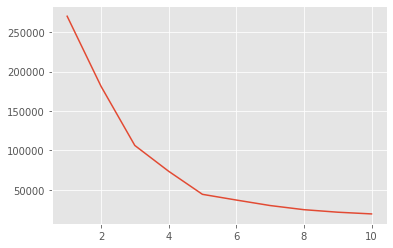

In [ ]:
x = range(1,11)
y = inertia

plt.plot(x, y)

엘보우 포인트를 5 부근에서 관찰 가능 -> k = 5로 설정

In [ ]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++') )
y_kmeans = kmeans.fit_predict(df_2)

print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


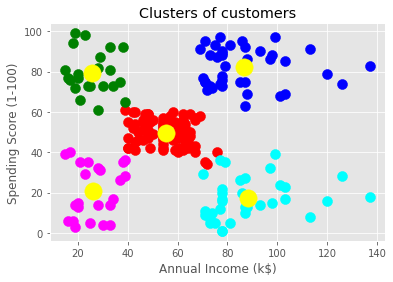

In [ ]:
plt.scatter(df_2[y_kmeans == 0, 0], df_2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_2[y_kmeans == 1, 0], df_2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_2[y_kmeans == 2, 0], df_2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_2[y_kmeans == 3, 0], df_2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df_2[y_kmeans == 4, 0], df_2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### DBSCAN 클러스터링 진행

feature 간 거리를 기준으로 계산하기 때문에 정규화를 진행

In [ ]:
# 소득과 소비수준에 관한 클러스터링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=2)
model.fit(df_scale)

df_scale['cluster'] = model.fit_predict(df_scale)

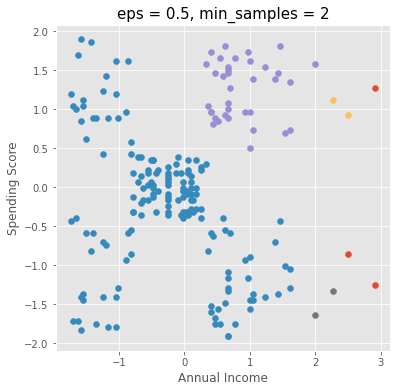

In [ ]:
plt.figure(figsize = (6, 6))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'])

plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

현재의 파라미터로는 클러스터링이 잘 되지 않는 것을 관찰할 수 있다.

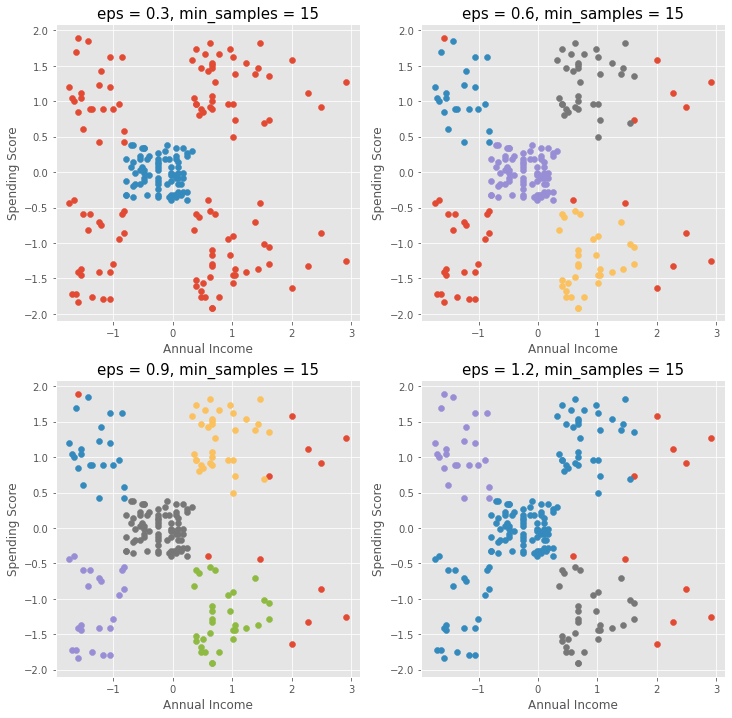

In [ ]:
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4):
    # epsilon을 증가시키면서 반복
    eps = 0.3 * (i + 1)
    min_samples = 15

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)

    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(df_scale.loc[df_scale['cluster'] == j, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == j, 'Spending Score (1-100)'])

    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)

plt.show()

다양한 파라미터로 클러스터링 해본 결과 eps = 0.9일때가 좋은 결과를 보였다. (min_samples = 15로 고정시키고 진행)

In [ ]:
#나이와 소비수준에 관한 클러스터링

data = df[['Age', 'Spending Score (1-100)']]
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=13)
model.fit(df_scale)

df_scale['cluster'] = model.fit_predict(df_scale)

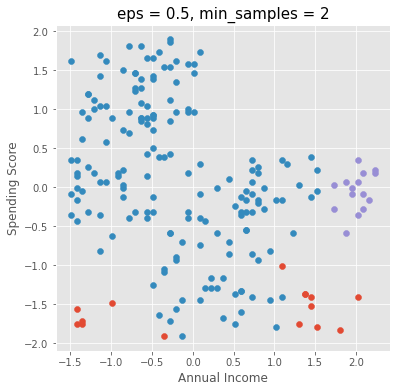

In [ ]:
plt.figure(figsize = (6, 6))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Age'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'])

plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

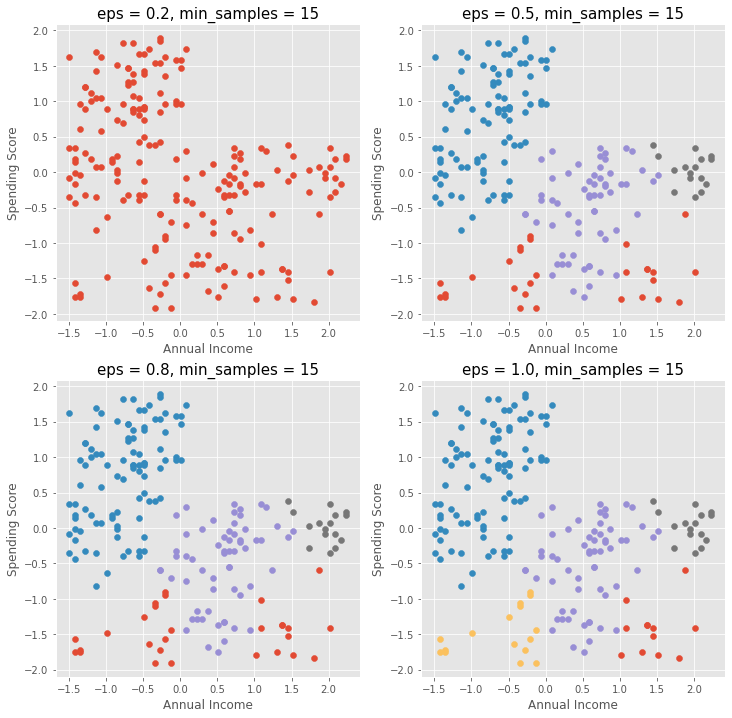

In [ ]:
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4):
    # epsilon을 증가시키면서 반복
    eps = 0.25 * (i + 1)
    min_samples = 15

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)

    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(df_scale.loc[df_scale['cluster'] == j, 'Age'], df_scale.loc[df_scale['cluster'] == j, 'Spending Score (1-100)'])

    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)

plt.show()

eps가 0.8 혹은 1.0일 때 가장 클러스터링이  잘 된 것을 관찰할 수 있다.

### 계층적 군집화 진행

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
#마찬가지로 거리 기반으로 군집화하므로 정규화 진행
df_scale = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

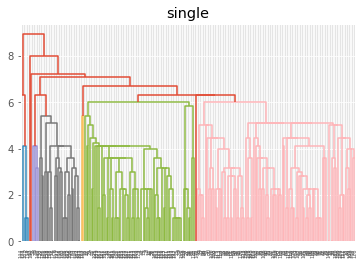

In [ ]:
hierarchical_single = linkage(data, method='single')
dn = dendrogram(hierarchical_single)
plt.title('single')
plt.show()

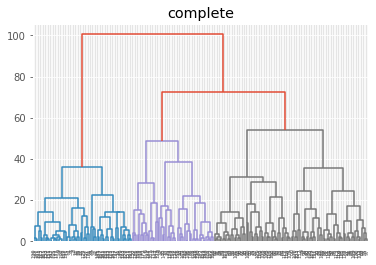

In [ ]:
hierarchical_single = linkage(data, method='complete')
dn = dendrogram(hierarchical_single)
plt.title('complete')
plt.show()

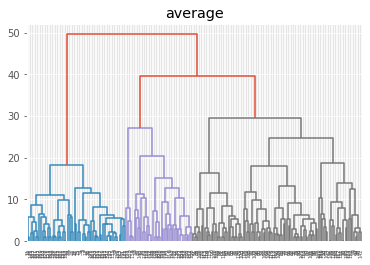

In [ ]:
hierarchical_single = linkage(data, method='average')
dn = dendrogram(hierarchical_single)
plt.title('average')
plt.show()

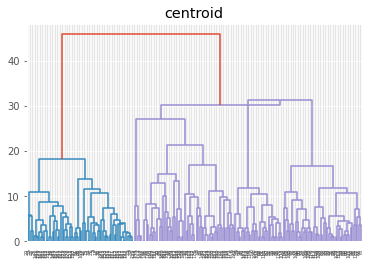

In [ ]:
hierarchical_single = linkage(data, method='centroid')
dn = dendrogram(hierarchical_single)
plt.title('centroid')
plt.show()

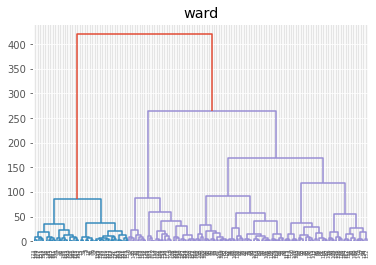

In [ ]:
hierarchical_single = linkage(data, method='ward')
dn = dendrogram(hierarchical_single)
plt.title('ward')
plt.show()

average 혹은 complet가 계층적 군집화가 잘 이뤄진 것을 볼 수 있다.

## 평가

### 실루엣 계수

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score 
# kmeans
result_df = pd.DataFrame(data = y_kmeans)

score_samples = silhouette_samples(df_2, result_df)
print('silhouette_samples() return 값의 shape: ', score_samples.shape)

average_score = silhouette_score(df_2, result_df)
print('K-means Silhouette Analysis Score: {0:.3f}'.format(average_score))

silhouette_samples() return 값의 shape:  (200,)
K-means Silhouette Analysis Score: 0.554


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# DBSCAN

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

model = DBSCAN(eps=0.9, min_samples=15)
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

score_samples = silhouette_samples(df_scale, df_scale['cluster'])
print('silhouette_samples() return 값의 shape: ', score_samples.shape)

average_score = silhouette_score(df_scale, df_scale['cluster'])
print('DBSCAN Silhouette Analysis Score: {0:.3f}'.format(average_score))

silhouette_samples() return 값의 shape:  (200,)
DBSCAN Silhouette Analysis Score: 0.466


k-means와 DBSCAN 모두

* 연간 소득과 소비 수준에 관한 클러스터링을 진행하고, 그에 따른 실루엣 계수를 구해보았다.

* K-means : 0.554
* DBSCAN : 0.466



클러스터링을 시각화한 결과로 판단해보았을때도 K-means가 더욱 명확하게 클러스터링 됐다는 것을 알 수 있었다. 강의에서는 DBSCAN이 복잡하고 지역적 패턴이 나타나는 경우에는 더 잘 작동된다고 하여 더 좋은 성능을 보일 것이라고 기대했다. 그러나 파라미터를 조정하는 과정이 더 복잡하고 민감하다는 것을 과제 진행을 통해 알 수 있었다.